<h1>7. Más allá de matplotlib: seaborn</h1>

Lejos de ser un paquete de visualización creado completamente de cero, el objetivo de seaborn ha sido siempre el de ofrecer un acceso más simple a la creación de gráficos basados en datos de matplotlib. De hecho, tal como indican en su documentación, seaborn "debe ser visto como un complemento a matplotlib y no un reemplazo del mismo". 

seaborn depende de matplotlib para la propia creación de gráficos y únicamente implementa una capa de abstracción superior ofrece:
<ul>
<li>Acceso directo a set de datos de prueba</li>
<li>Mapeo de elementos visuales desde DataFrame completos utilizados como entrada.</li>
<li>Automatización de determinados gráficos estadísticos.</li>
<li>Temas y estilos más atractivos visualmente que matplotlib (al menos en versiones anteriores).</li>
<li>Mayor facilidad para la creación de gráficos "multigráfico".</li>
</ul>

En definitiva, nos da las herramientas necesarias para facilitar el uso de matplotlib "aproximándolo" a lo que hace ggplot2 en R.

<h2>Utilizando seaborn</h2>

Como hemos dicho, seaborn está desarrollado como complemento a matplotlib por lo que para permitir su funcionamiento tendremos que seguir las mismas reglas que con matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para poder usar seaborn, tendremos que importar el paquete del mismo nombre. Como siempre, el alias que asignemos es opcional, pero el estándar es usar <b>sns</b>.

In [2]:
import seaborn as sns

## Acceso a sets de datos de prueba

Al igual que ocurre en ggplot2, seaborn nos da acceso a la carga directa de un cojunto amplio de sets de datos de prueba. Para llevar a cabo su carga, podemos utilizar la función load_dataset.

In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

## Mapeo de elementos visuales a variables

Uno de los principales puntos negativos de matplotlib es la falta de asociación entre los datos que se le suministran a los gráficos para su visualización. Es decir, los valores asignados a diferentes elementos visuales (posición en X, posición en Y, colores, formas, etc.) se deben suministrar de forma manual a independiente.

seaborn trata de mejorar esta situación incorporando un parámetro <b>data</b> a todos sus gráficos de forma que una vez establecido el set de datos (un DataFrame) podamos hacer referencia directa a las variables que incorpora. 

En definitiva, trata de incorporar la capa "de datos" presente en ggplot2 a la visualización en Python.

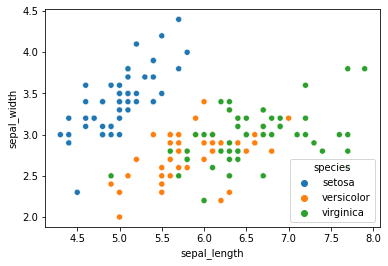

In [7]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

<h2>Algunos gráficos con seaborn</h2>

Dado que seaborn es un complemento sobre matplotlib, los tipos de gráfico que ofrece son, precisamente, aquellos de los que matplotlib carece (o hace complicada su utilización). Sin embargo, dado que matplotlib sigue evolucionando, algunos de los gráficos ya forman parte de la librería y, con el tiempo, es de esperar que sigan incorporándose más.

<h3>Distribución de una variable</h3>

Como hemos visto, una de las carencias que más impactan al trabajar con matplotlib es la posibilidad de mostrar la distribución de las variables (aunque disponemos de histogramas y, ahora, de los gráficos de violín). 

seaborn ofrece múltiples funciones que solventan esta carencia tanto para distribuciones univariantes...

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


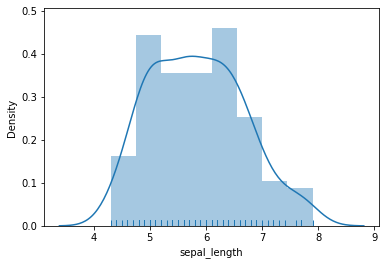

In [8]:
sns.distplot(iris['sepal_length'], hist = True, kde = True, rug = True)
plt.show()

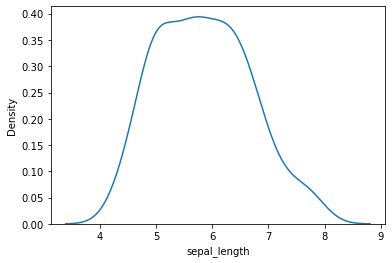

In [9]:
sns.kdeplot(iris['sepal_length'])
plt.show()

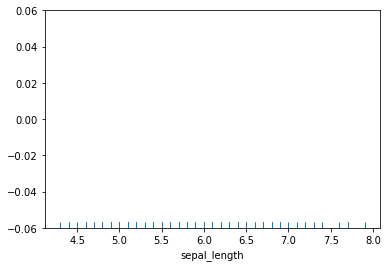

In [10]:
sns.rugplot(iris['sepal_length'])
plt.show()

<h3>Distribución de dos variables</h3>

... como para distribuciones bivariantes...

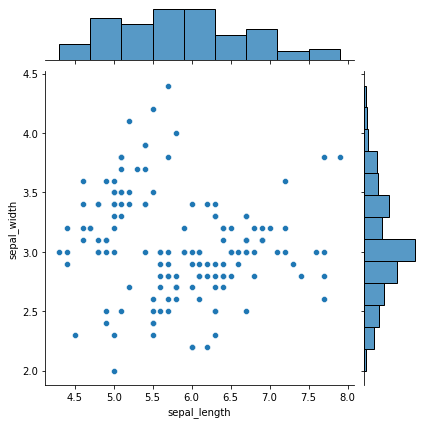

In [11]:
sns.jointplot(x = "sepal_length", y = "sepal_width", data = iris, kind = "scatter")
plt.show()

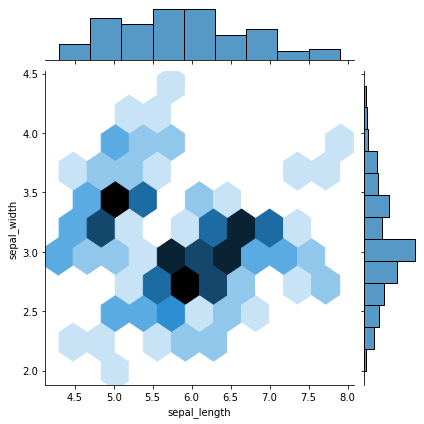

In [13]:
sns.jointplot(x = "sepal_length", y = "sepal_width", data = iris, kind = "hex")
plt.show()

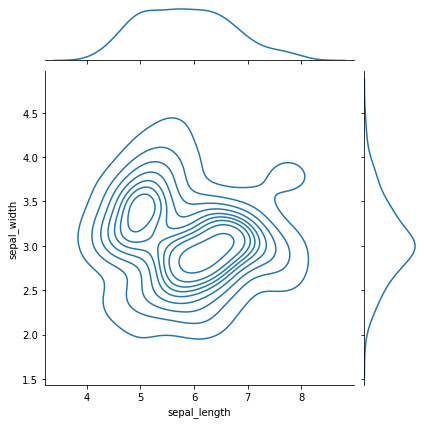

In [14]:
sns.jointplot(x = "sepal_length", y = "sepal_width", data = iris, kind = "kde")
plt.show()

<h3>Relación 2 a 2 de variables</h3>

... como para estudiar la relación entre todas las variables con una única visualización.

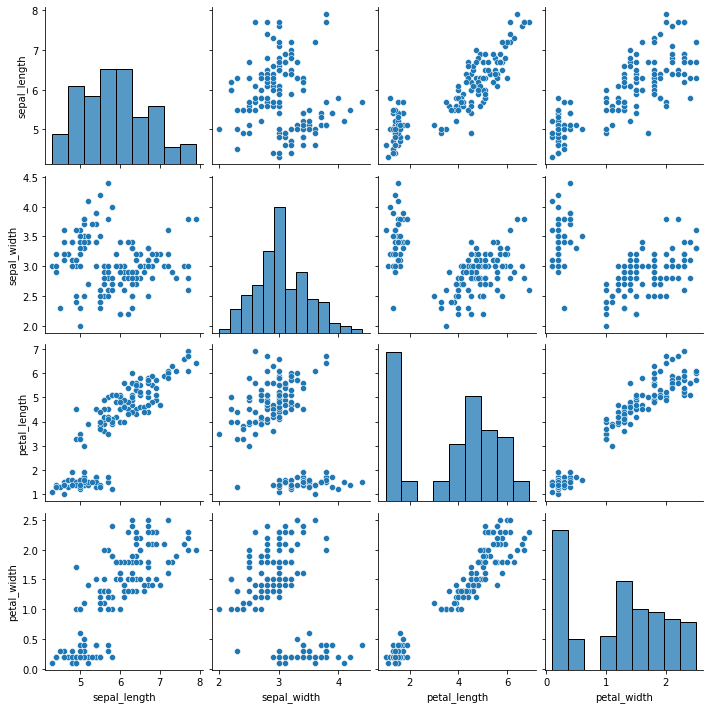

In [15]:
sns.pairplot(iris)
plt.show()

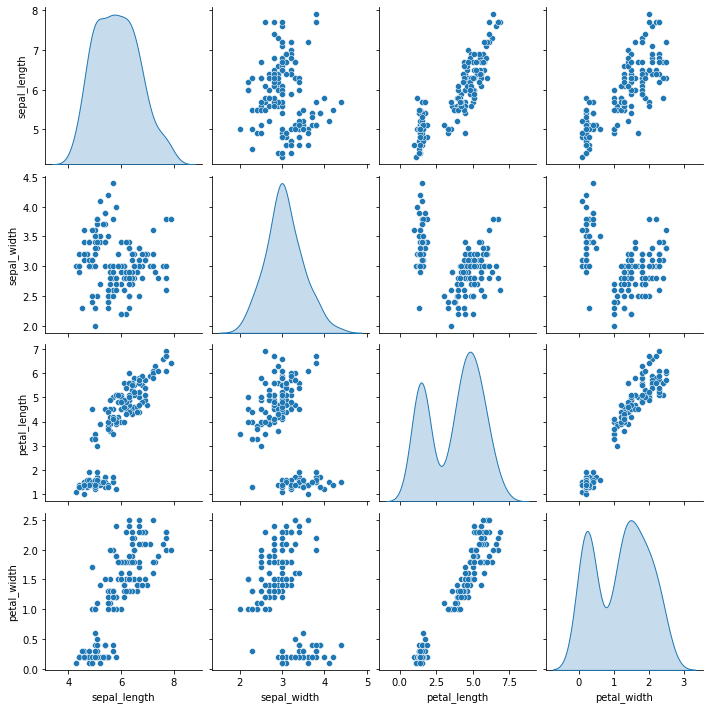

In [16]:
sns.pairplot(iris, diag_kind="kde")
plt.show()

<h3>Regresiones</li>

Otra de las "carencias" de matplotlib es la inclusión de "estadísticos" que ayuden a comprender el contenido de una visualización y su dataset subyacente de forma directa (ya que siempre se pueden calcular e incluir como una capa adicional a cualquier gráfico). 

seaborn trata de incluir esta funcionalidad para "aproximar" el funcionamiento de los stats de ggplot2.

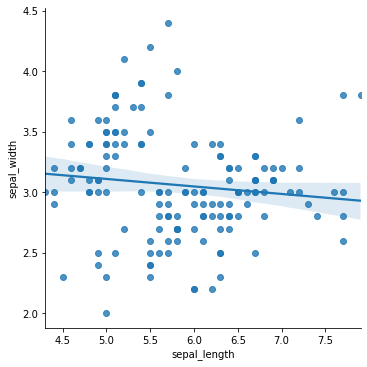

In [17]:
sns.lmplot(data=iris, x = "sepal_length", y = "sepal_width")
plt.show()

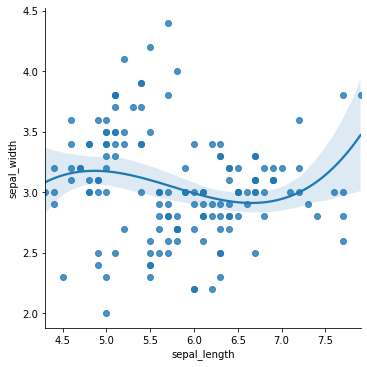

In [18]:
sns.lmplot(data=iris, x = "sepal_length", y = "sepal_width", order = 3)
plt.show()

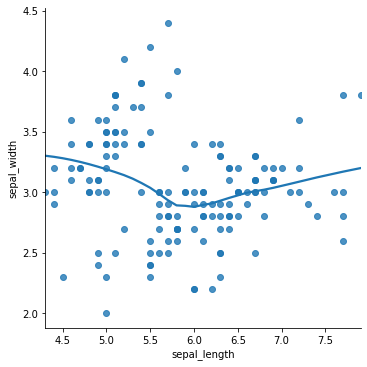

In [19]:
sns.lmplot(data=iris, x = "sepal_length", y = "sepal_width", lowess = True)
plt.show()

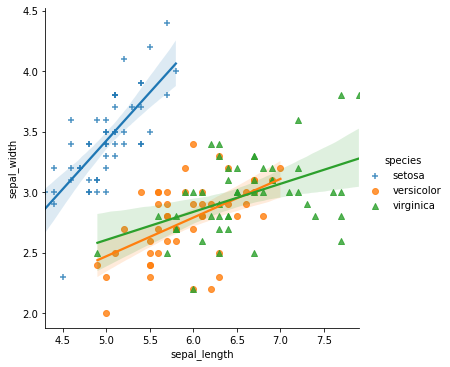

In [20]:
sns.lmplot(data=iris, x = "sepal_length", y = "sepal_width", hue="species", markers=["+", "o", "^"])
plt.show()

<h2>Multigráficos con seaborn</h2>

Aunque hemos visto que matplotlib permite la creación de gráficos multigráfico, también hemos hablado de las limitaciones que tienen su generación ya que se basan únicamente en posicionamiento y es responsabilidad del usuario el ajuste de escalas, el dibujado de cada gráfico en su posición correspondiente, etc.

seaborn trata de replicar el funcionamiento de los facets de ggplot2 facilitando la creación de gráficos multigráfico en base a datos.

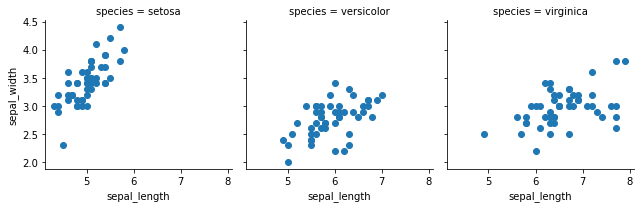

In [21]:
grid = sns.FacetGrid(iris, col = "species")
grid.map(plt.scatter, "sepal_length", "sepal_width")
plt.show()

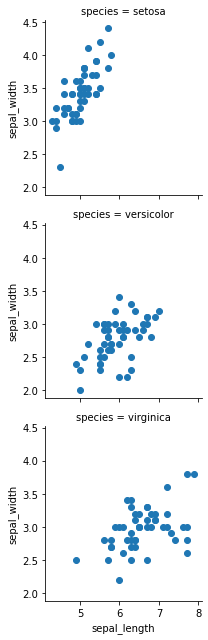

In [22]:
grid = sns.FacetGrid(iris, row = "species")
grid.map(plt.scatter, "sepal_length", "sepal_width")
plt.show()

In [ ]:
diamonds = pd.read_table("diamonds.txt", sep = ",")
grid = sns.FacetGrid(diamonds, col = "cut", row = "color")
grid.map(plt.hist, "price")
plt.show()